# Model Training and Evaluation
This is the final notebook for the training and evaluation of the BERT-like architecture, built on top of TensorFlow examples and tutorials. It will use the training data from the vectorized_samples directory containing 3.1 GB of 5000 .npy fizes of vectorized MalDroid analysis. The samples are broken up into categories as follows:
* Adware: 812
* Banking: 1438
* SMS: 1442
* Riskware: 1447
## Objectives
1. Set up input pipeline to read directly from notebook filesystem
2. Implement pipeline optimizations outlined in the TensorFlow docs
3. Define the BERT from TensorFlow docs, adding head classifier layer(s)
4. Write the training loop 
5. Implement logging of associated metrics
6. Train and evaluate

In [13]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import mixed_precision
# confirm tensorflow is using GPU:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

import numpy as np
import time
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2.4.1
Num GPUs Available:  1


In [2]:
# setup mixed precision for GPU
mixed_precision.set_global_policy('mixed_float16')
# setup mixed precision for TPU
# mixed_precision.set_global_policy('mixed_bfloat16')
# see https://www.tensorflow.org/guide/mixed_precision#summary for mixed precision guidelines

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1660 Ti, compute capability 7.5


## Input pipeline
The pipeline needs to meet the following criteria:
* Avoid loading the whole dataset into memory
* Apply padding to the samples (max_len: 2783755, trimmed to 5039: 1283945)
* Implement a fix for unbalanced data
* Batch the samples

In [ ]:
# get max length of samples
# max_sample_len = 0
# for mal_class in os.listdir('vectorized_samples'):
#     parent_path = 'vectorized_samples/' + mal_class + '/'
#     for sample_path in os.listdir(parent_path):
#         len_list.append(np.load(parent_path + sample_path).size)
#         if sample_len > max_sample_len:
#             max_sample_len = sample_len

In [5]:
# get list of sample lengths for analysis
# len_list = []
# for mal_class in os.listdir('vectorized_samples'):
#     parent_path = 'vectorized_samples/' + mal_class + '/'
#     for sample_path in os.listdir(parent_path):
#         len_list.append(np.load(parent_path + sample_path).size)

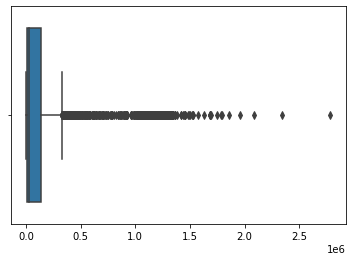

In [15]:
# plot = sns.boxplot(x=len_list)

Boxplot of sample lengths reveals a large amount of outliers, it would be benificial to model performance to limit the max length of the dataset. We have 5,139 samples therefore we could cut the 100 or so greatest lengths. The results of this process shown below yield a max sample length of 1283945, a significant decrease from 2.78 million.

In [16]:
# len_list.sort(reverse=True)
# len_list = len_list[100:]
# max_sample_len_trimmed = len_list[0]
# print(max_sample_len_trimmed)

1283945


Portions of this page are reproduced from and/or modifications based on work created and shared by Google (https://developers.google.com/readme/policies) and used according to terms described in the Creative Commons 4.0 Attribution License (https://creativecommons.org/licenses/by/4.0/).